# **Prediksi Penggunaan Energi Listrik Rumah Hunian**

**Created by**: I Nyoman Kusuma Wardana

### **Dataset**:
**Sumber dataset**: https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

**Creator**: Luis Candanedo

### **Referensi**:
L. M. Candanedo, V. Feldheim, and D. Deramaix, “Data driven prediction models of energy use of appliances in a low-energy house,” Energy Build., vol. 140, pp. 81–97, Apr. 2017, doi: 10.1016/j.enbuild.2017.01.083.

I. N. K. Wardana, N. Jawas, and I. K. A. A. Aryanto, “Prediksi Penggunaan Energi Listrik pada Rumah Hunian Menggunakan Long Short-Term Memory,” TIERS Information Technology Journal, vol. 1, no. 1, Art. no. 1, Jun. 2020, Accessed: Jul. 01, 2020. [Online]. Available: http://journal.undiknas.ac.id/index.php/tiers/article/view/2475.



# Seting Lingkungan Python
Install pustaka yang dibutuhkan

In [ ]:
!pip install pandas numpy matplotlib seaborn sklearn
#!pip install tensorflow==2.0.0-rc1

### Mount Drive

<p>Klik link pada keterangan <b>Go to this URL in a browser</b>. Kemudian masuk ke akun Google. Selanjutnya akan diberika kode akses. Salin kode akses tersebut dan masukkan di kolom <b>Enter your authorization code:</b>.</p>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Unggah Data yang Diperlukan
* Cari lambang folder di sisi kiri atas
* Pilih Upload to Session Storage
* Cari dan pilih 'dataComplete.csv' pada komputer Anda

# Import Pustaka yang Diperlukan

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Data

In [ ]:
# unggah dataset
filename = "dataComplete.csv"
df = pd.read_csv("/content/" + filename)

In [ ]:
# Konversi 'Date' column to datetime format 
df['date']= pd.to_datetime(df['date'])

In [ ]:
# Perlihatkan dataset
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week,Month
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433,13.275433,61200,1,1,January
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195,18.606195,61800,1,1,January
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668,28.642668,62400,1,1,January
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390,45.410390,63000,1,1,January
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097,10.084097,63600,1,1,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812,62400,1,5,May
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940,63000,1,5,May
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117,63600,1,5,May
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784,64200,1,5,May


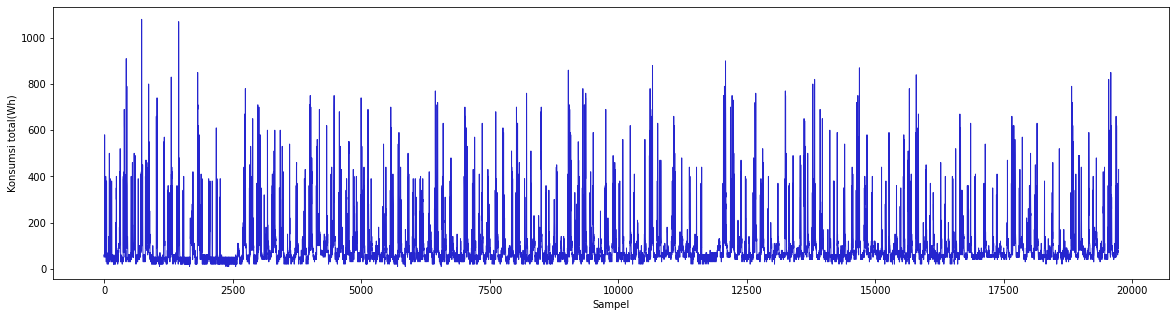

In [ ]:
# Ploting Konsumsi Energi
ax = df['Appliances'].plot(color='#2525cf',linestyle='-', linewidth=1, figsize=(20, 5))
ax.set_xlabel('Sampel')
ax.set_ylabel('Konsumsi total(Wh)')
ax.set_facecolor("white")

In [ ]:
# Salin Dataset yang Asli. Hanya dataset yang baru (hasil salinan) diubah-ubah.
df2 = df.set_index('date')

Text(0, 0.5, 'Appliances (Wh)')

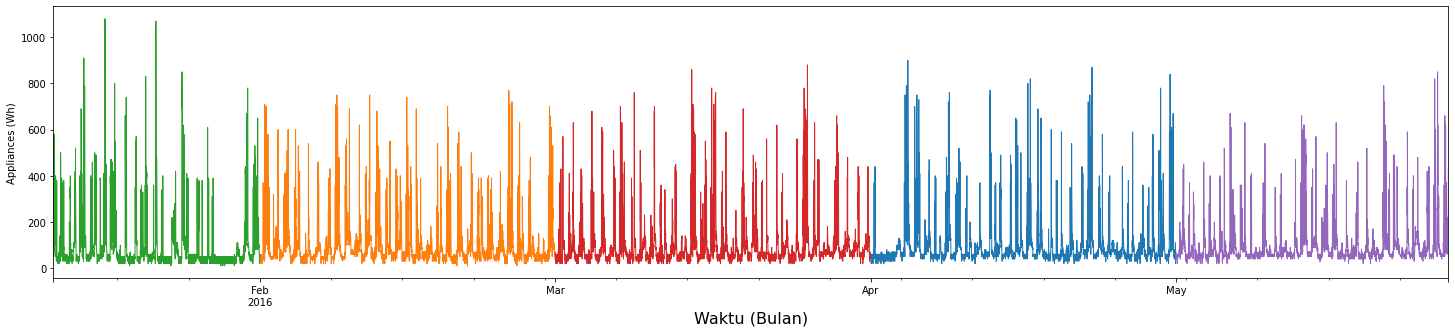

In [ ]:
# Lihat konsumsi energi perbulan
ax = plt.gca()
df2.groupby('Month')['Appliances'].plot(figsize=(25,5),linewidth=1, ax=ax)
ax.set_xlabel('Waktu (Bulan)', size=16)
ax.set_ylabel('Appliances (Wh)')

Text(0, 0.5, 'Appliances (Wh)')

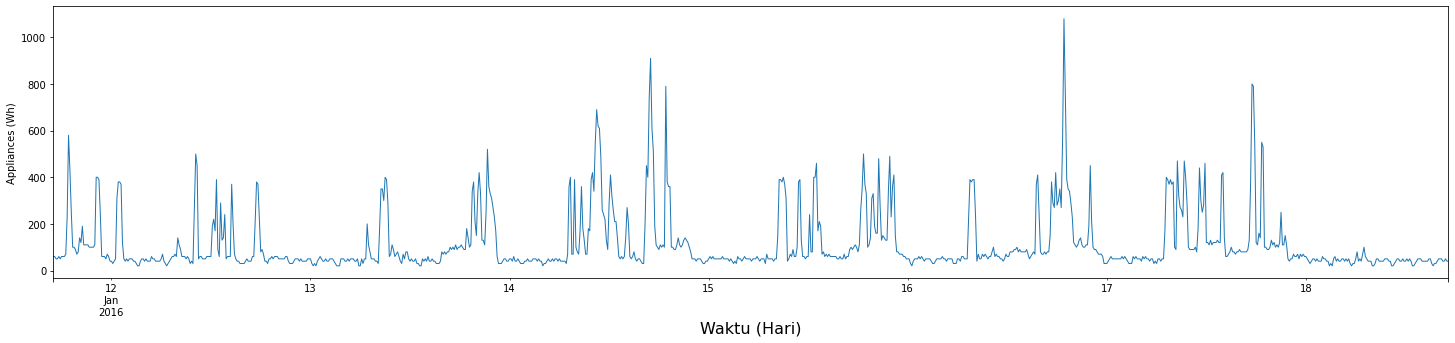

In [ ]:
# Lihat grafik lebih dekat pola konsumsi selama 7 hari
ax = plt.gca()
df2.iloc[0:1010].plot(y ='Appliances' ,figsize=(25,5),linewidth=1, ax=ax, legend = False)
ax.set_xlabel('Waktu (Hari)', size=16)
ax.set_ylabel('Appliances (Wh)')

In [ ]:
# Dari index, kita bisa menentukan 'hour'. Gunakan 'hour' sebagai fitur tambahan
df2['hour'] = df2.index.hour

<p> Kita juga dapat melihat nilai korelasi antar atribut di dalam dataset. Korelasi dapat bernilai positif maupaun negatif. Nilai korelasi memiliki rentang dari -1 sampai 1. </p>
<p> Nilai korelasi disimbulkan dengan koefisien r. Ketika 0< r <1, maka dikatakan kedua atribut memiliki korelasi positif, dan ketika -1< r <0 maka dikatakan sebagai korelasi negatif. Nilai 0 menunjukkan tidak ada korelasi antaratribut. Ketika nilai mutlak dari r mendekati 1, maka kedua atribut memiliki korelasi yang semakin besar. </p>



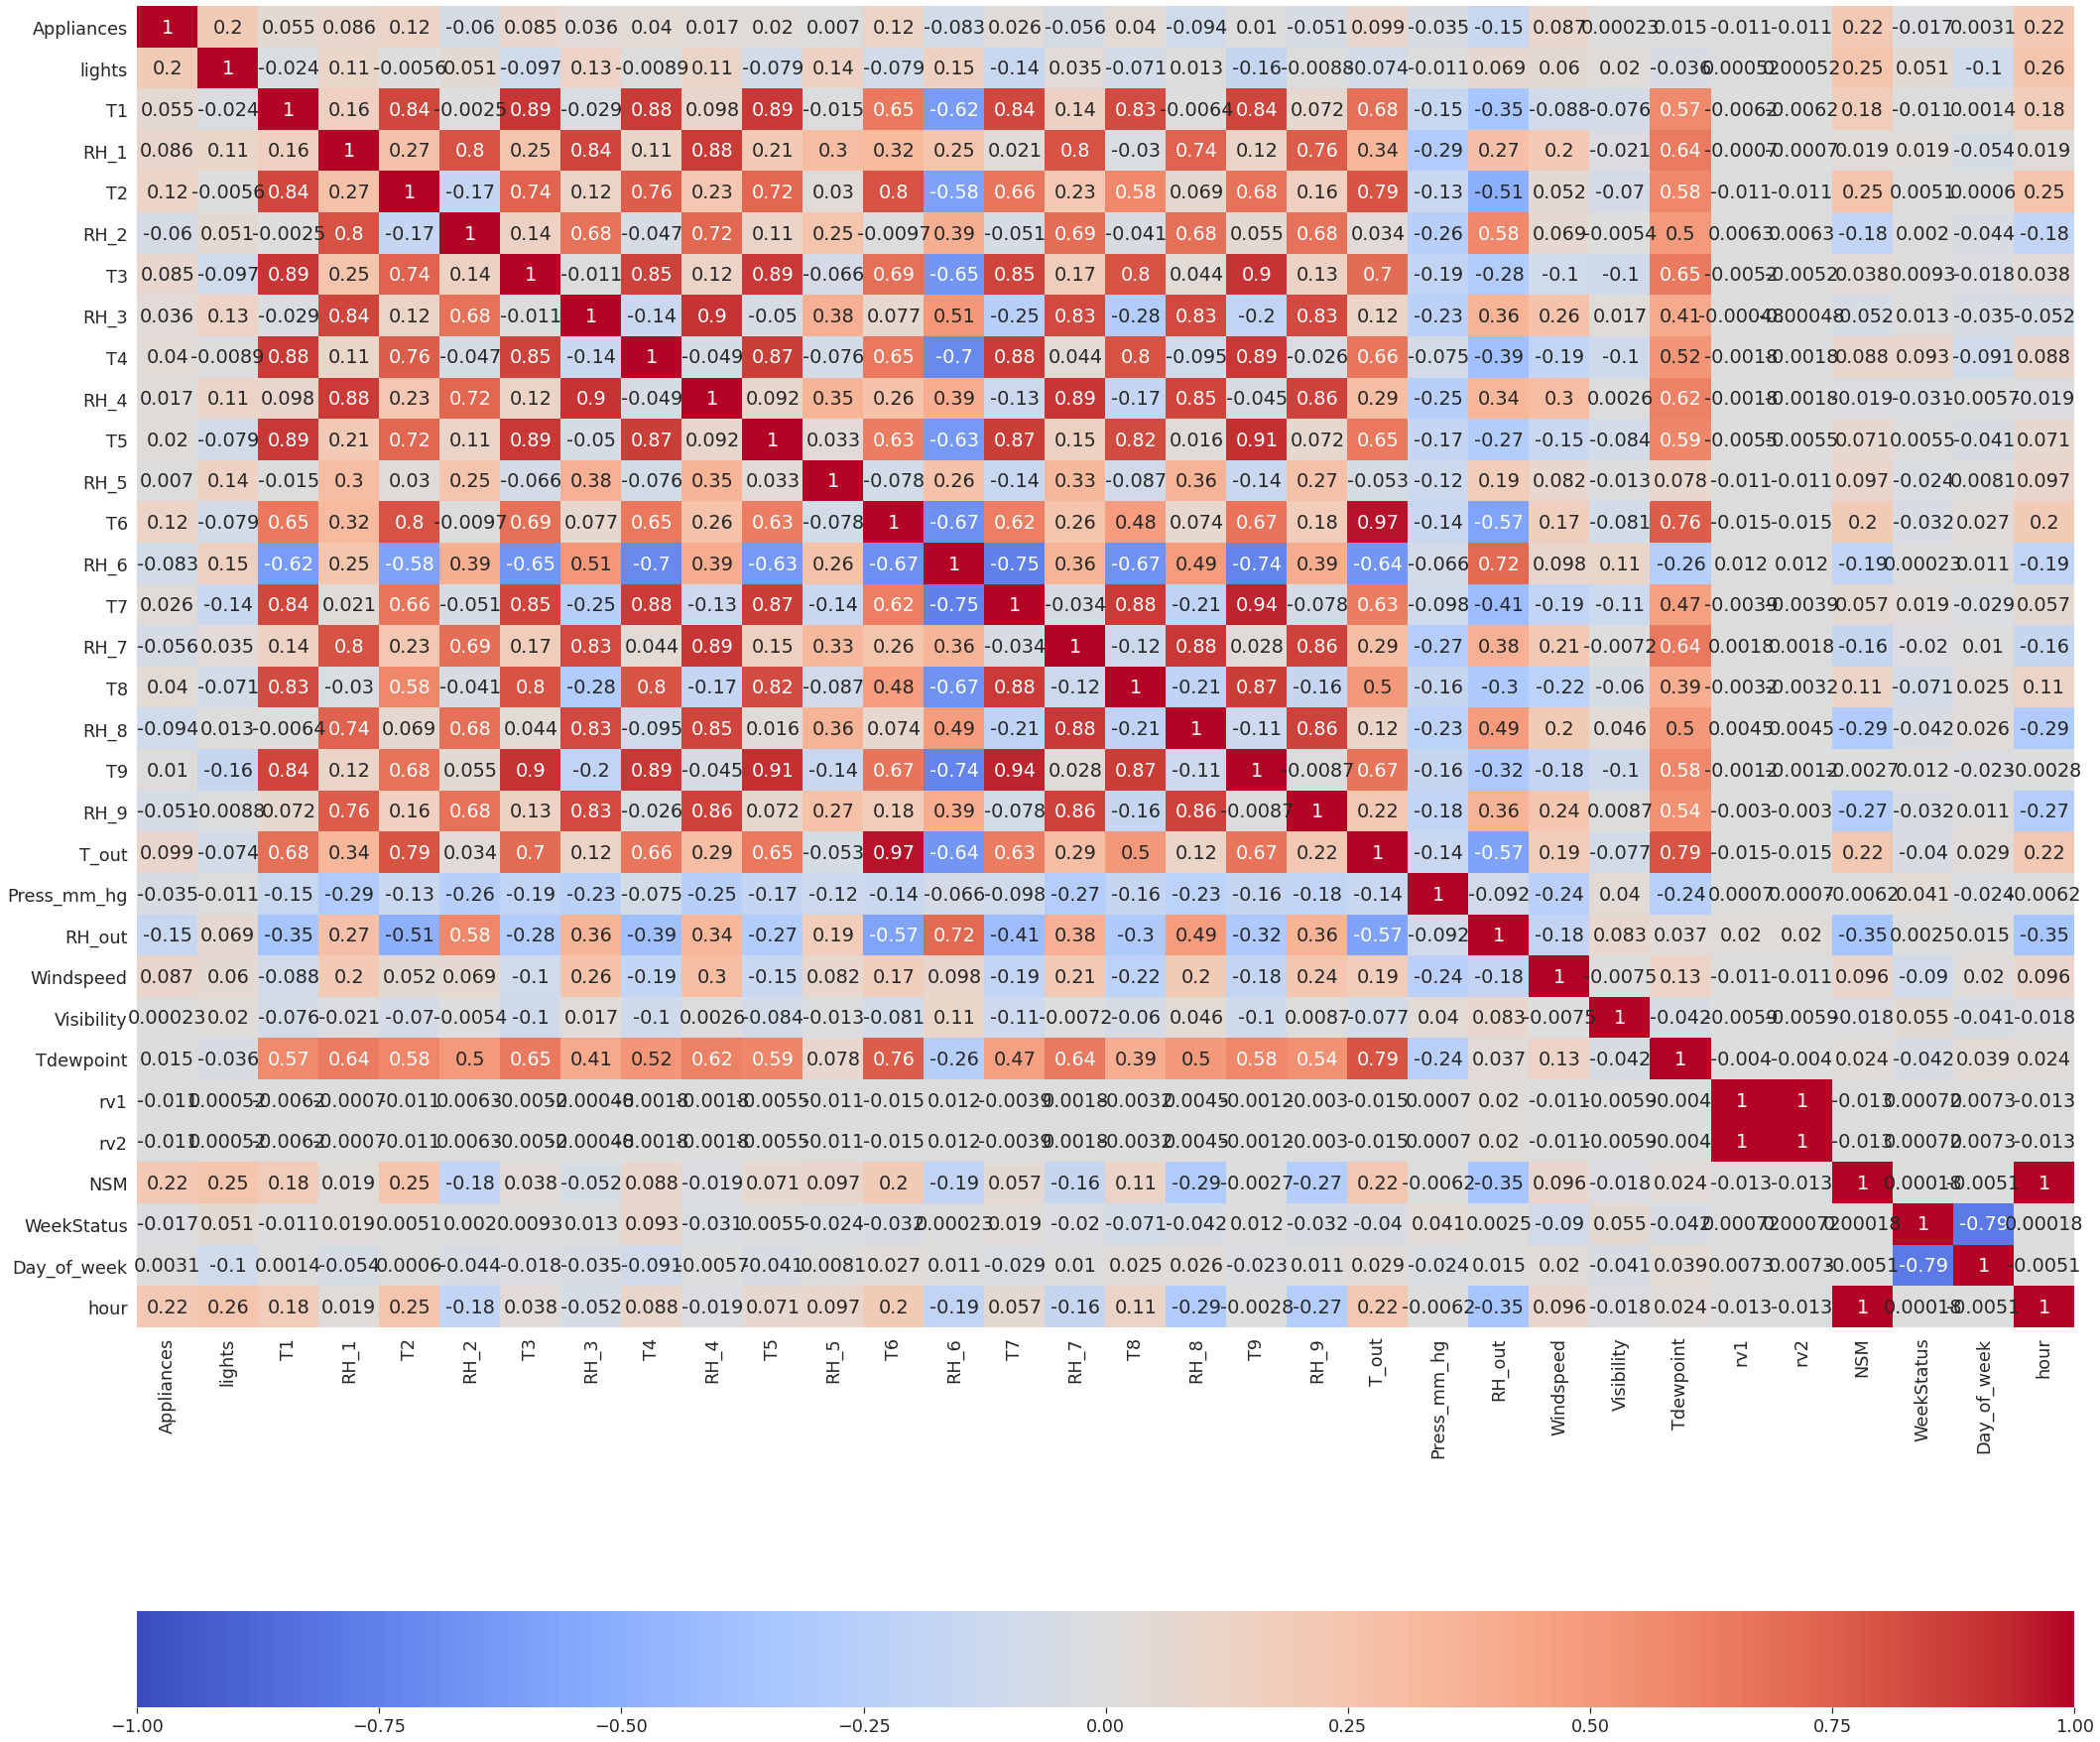

In [ ]:
subjective_corr = df2.corr()
subjective_corr[np.abs(subjective_corr)<.00001] = 0
plt.figure(figsize=(35,35))
sns.set(font_scale=1.6)
sns.heatmap(subjective_corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            #mask = mask,
            annot=True,
            cbar_kws={"orientation": "horizontal"})

# Buat Dataset Untuk Model

In [ ]:
# Tidak semua fitur diikutkan dalam pelatihan. Kita pilih fitur yang memiliki nilai r>0.02 terhadap Appliances
feature = ['Appliances','lights','T1','RH_1','T2','RH_2','T3','RH_3','T4','T6','RH_6','T7','RH_7', 'T8','RH_8','RH_9','T_out','Press_mm_hg','RH_out','Windspeed','NSM','hour']

In [ ]:
# Pisah menjadi data input (x) dan data target (y)
data_x = df2[feature]
data_y = df2['Appliances']

In [ ]:
# Lihat ada berapa baris dan kolom dalam data input
data_x.shape

(19735, 22)

In [ ]:
# Lihat ada berapa baris dan kolom dalam data target
data_y.shape

(19735,)

In [ ]:
# ubah ke array
data_x = np.array(data_x)
data_y = np.array(data_y)

# Bulatkan dua angka di belakang koma 
data_x = data_x.round(2)
data_y = data_y.round(2)

# Bagi Data menjadi Data Latih, Data Validasi dan Data Uji

Pembagian sebagai berikut:
* 60% untuk data latih (training)
* 20% untuk data validasi
* 20% untuk data test

In [ ]:
train_size = int(0.6*data_x.shape[0])
val_size = int(0.2*data_x.shape[0])
test_size = int(0.2*data_x.shape[0])

train_x, val_x, test_x = data_x[0:train_size,:], data_x[train_size:(train_size+val_size),:], data_x[(train_size+val_size):(train_size+val_size+test_size),:]
train_y, val_y, test_y = data_y[0:train_size], data_y[train_size:(train_size+val_size)], data_y[(train_size+val_size):(train_size+val_size+test_size)]

# Normalisasi Data

Agar proses training dapat berjalan optimal, data input sebaiknya di normalisasi. Rentang umum yang biasa digunakan adalah (0,1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# normalisasi dataset
scaler = MinMaxScaler(feature_range=(0, 1))
# scaler hanya berdasarkan data training --> jangan 'mengintip' masa depan
scaler.fit(train_x)

# Scale all
train_x = scaler.transform(train_x)
val_x = scaler.transform(val_x)
test_x = scaler.transform(test_x)

In [ ]:
# Simpan data hasil konversi --> dipakai untuk simulasi di Raspberry Pi
numpy_data = np.array(test_x)
df_csv = pd.DataFrame(data=numpy_data)
df_csv.to_csv('data_x.csv', header=feature, index=False)

numpy_data = np.array(test_y)
df_csv = pd.DataFrame(data=numpy_data)
df_csv.to_csv('data_y.csv', header=['Appliances'], index=False)

In [ ]:
# cek hasil transformasi untuk baris pertama data training (data latih)
train_x[0]

array([0.04672897, 0.42857143, 0.42407661, 0.50642029, 0.41333333,
       0.7278607 , 0.30470588, 0.69024529, 0.45034642, 0.59070397,
       0.82301686, 0.22911392, 0.6535461 , 0.21259843, 0.66141193,
       0.61271102, 0.60732984, 0.09767442, 0.85454545, 0.5       ,
       0.71328671, 0.73913043])

# Buat Time Series Generator

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# Atur beberapa parameter untuk time series generator
length = 4   # gunakan data 4 jam terakhir untuk memprediksi 1 jam kedepan
batch_size = 1
n_features = train_x.shape[1]
n_targets = 1

In [ ]:
# Buat time series generator
train_data_gen = TimeseriesGenerator(train_x, train_y,
                               length=length, sampling_rate=1,stride=1, batch_size = batch_size)

val_data_gen = TimeseriesGenerator(val_x, val_y,
                               length=length, sampling_rate=1,stride=1, batch_size = batch_size)

test_data_gen = TimeseriesGenerator(test_x, test_y,
                               length=length, sampling_rate=1,stride=1, batch_size = batch_size)

In [ ]:
# Coba lihat seperti apa batch pertama
X,y = train_data_gen[0]
print(f'Diberikan input ini: \n{X}')
print(f'Prediksi nilai ini: \n {y}')

Diberikan input ini: 
[[[0.04672897 0.42857143 0.42407661 0.50642029 0.41333333 0.7278607
   0.30470588 0.69024529 0.45034642 0.59070397 0.82301686 0.22911392
   0.6535461  0.21259843 0.66141193 0.61271102 0.60732984 0.09767442
   0.85454545 0.5        0.71328671 0.73913043]
  [0.04672897 0.42857143 0.42407661 0.47792045 0.41333333 0.72437811
   0.30470588 0.693668   0.45034642 0.5816787  0.82075365 0.22911392
   0.65106383 0.21259843 0.66004112 0.6142006  0.60104712 0.1
   0.85454545 0.47642857 0.72027972 0.73913043]
  [0.03738318 0.42857143 0.42407661 0.46570623 0.41333333 0.7199005
   0.30470588 0.70165431 0.44226328 0.56949458 0.8105692  0.22911392
   0.6464539  0.21259843 0.65558602 0.61122145 0.59528796 0.10232558
   0.85454545 0.45214286 0.72727273 0.73913043]
  [0.03738318 0.57142857 0.42407661 0.45850298 0.41333333 0.71791045
   0.30470588 0.70564746 0.43764434 0.56362816 0.81351137 0.22025316
   0.64148936 0.20134983 0.65078821 0.60625621 0.58900524 0.10465116
   0.85454545 0

# Buat Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras import initializers

# Tentukan jumlah neuron
neuron = 30
# Gunakan model sekuensial
model = Sequential()

# Layer tersembunyi
model.add(LSTM(neuron,input_shape=(length, n_features), activation = 'relu', return_sequences=True))
model.add(LSTM(neuron, activation='relu'))

# Prediksi akhir
model.add(Dense(neuron, activation='relu'))
model.add(Dense(n_targets))

# model compile
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [ ]:
# Simpulkan model yang digunakan
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4, 30)             6360      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 14,641
Trainable params: 14,641
Non-trainable params: 0
_________________________________________________________________


# Latih Model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=3)
history = model.fit(train_data_gen, validation_data=val_data_gen, epochs=50, callbacks=[early_stop], shuffle=True)

Epoch 1/50
11837/11837 [==============================] - 55s 5ms/step - loss: 9240.7832 - mse: 9240.7832 - val_loss: 7701.6455 - val_mse: 7701.6455
Epoch 2/50
11837/11837 [==============================] - 54s 5ms/step - loss: 6420.2085 - mse: 6420.2085 - val_loss: 4751.6646 - val_mse: 4751.6646
Epoch 3/50
11837/11837 [==============================] - 57s 5ms/step - loss: 5335.8838 - mse: 5335.8838 - val_loss: 4442.6704 - val_mse: 4442.6704
Epoch 4/50
11837/11837 [==============================] - 56s 5ms/step - loss: 4935.4497 - mse: 4935.4497 - val_loss: 4607.6655 - val_mse: 4607.6655
Epoch 5/50
11837/11837 [==============================] - 55s 5ms/step - loss: 4771.7734 - mse: 4771.7734 - val_loss: 4453.4653 - val_mse: 4453.4653
Epoch 6/50
11837/11837 [==============================] - 56s 5ms/step - loss: 4724.6270 - mse: 4724.6270 - val_loss: 4770.8125 - val_mse: 4770.8125


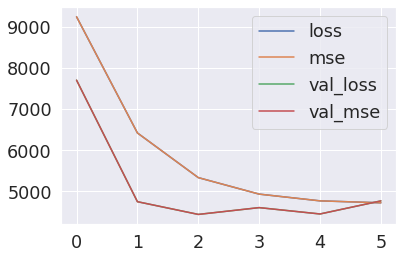

In [ ]:
# Plot Nilai Loss
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
# Simpan model jika diperlukan
model.save('modelEnergyPrediction.h5')

# Evaluasi Model

In [ ]:
# Gunakan fungsi berikut untuk mengekstrak nilai y dari timeSeriesGenerator
def get_y_from_generator(gen):
    '''
    Get all targets y from a TimeseriesGenerator instance.
    '''
    y = None
    for i in range(len(gen)):
        batch_y = gen[i][1]
        if y is None:
            y = batch_y
        else:
            y = np.append(y, batch_y)
    y = y.reshape((-1,1))
    print(y.shape)
    return y

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import math

In [ ]:
# load pretrained model
model = load_model('modelEnergyPrediction.h5')

In [ ]:
model.evaluate(test_data_gen)

3943/3943 [==============================] - 6s 2ms/step - loss: 3965.5452 - mean_squared_error: 3965.5452


[3965.545166015625, 3965.545166015625]

In [ ]:
# Gunakan fungsi berikut untuk mencari nilai RMSE MAE and R2
def evaluateError(input_y, predictions):  
    
    testScoreRMSE_std = math.sqrt(mean_squared_error(input_y, predictions))
    print('RMSE : %.3f' % (testScoreRMSE_std))
    
    testScoreMAE_std = mean_absolute_error(input_y, predictions)
    print('MAE  : %.3f' % (testScoreMAE_std))    
    
    testScoreR2_std = r2_score(input_y, predictions)
    print('R2   : %.3f' % (testScoreR2_std))
    
    print('=======================================')

In [ ]:
def plotScatter(input_y, predictions):

    title = ['Appliance']
    plt.gca()
    plt.scatter(input_y,predictions, s=2)
    plt.plot(input_y,input_y,'r')
    plt.title(title)
    plt.xlabel('Real')
    plt.ylabel('Prediction')
    plt.show()

In [ ]:
# Prediksi Nilai
predictions = model.predict(test_data_gen)

In [ ]:
input_y = get_y_from_generator(test_data_gen)

(3943, 1)


In [ ]:
evaluateError(input_y, predictions)

RMSE : 62.973
MAE  : 27.582
R2   : 0.516


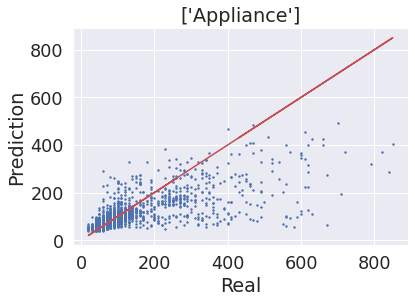

In [ ]:
plotScatter(input_y, predictions)

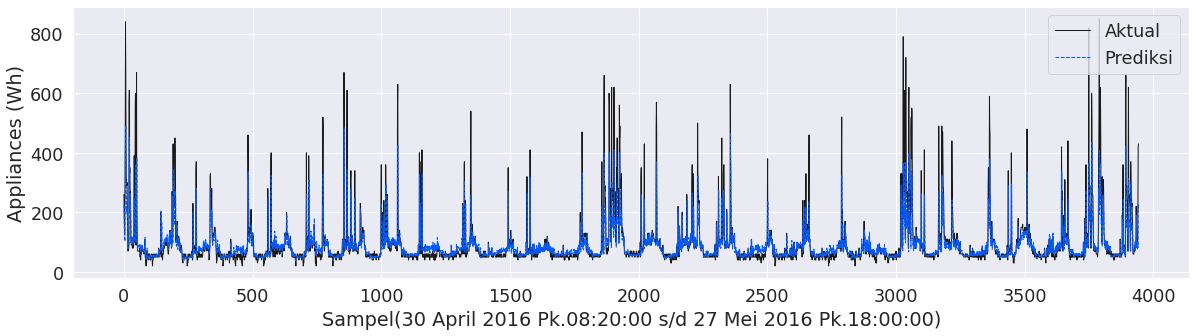

In [ ]:
# plot test prediction
plt.figure(figsize=(20,5))
plt.plot(input_y, 'k', label = 'Aktual', linewidth=1)
plt.plot(predictions, 'r--', color='#035afc',label = 'Prediksi', linewidth=1)
plt.ylabel('Appliances (Wh)')
plt.xlabel('Sampel(30 April 2016 Pk.08:20:00 s/d 27 Mei 2016 Pk.18:00:00)')
plt.legend(loc='upper right')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

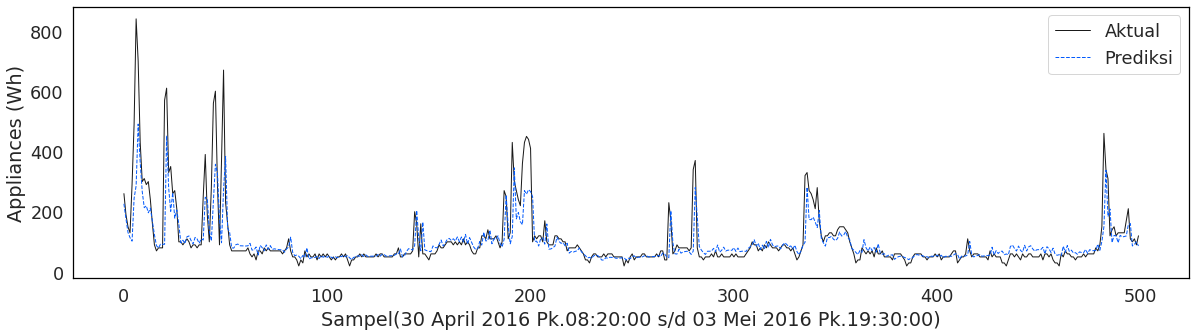

In [ ]:
# Lihat Lebih dekat

# plot test prediction
plt.figure(figsize=(20,5))
plt.plot(input_y[:500], 'k', label='Aktual',linewidth=1)
plt.plot(predictions[:500],'r--',color='#035afc', label='Prediksi',linewidth=1)
plt.ylabel('Appliances (Wh)')
plt.xlabel('Sampel(30 April 2016 Pk.08:20:00 s/d 03 Mei 2016 Pk.19:30:00)')
plt.legend(loc='upper right')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

# Konversi ke TensorFlow Lite

In [ ]:
import tensorflow as tf 
tf.__version__

'2.2.0'

In [ ]:
# Fungsi ini diambil dari Tim TensorFlow

run_model = tf.function(lambda x: model(x))
# This is important, let's fix the input size.
BATCH_SIZE = 1
STEPS = length
INPUT_SIZE = n_features
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec([BATCH_SIZE, STEPS, INPUT_SIZE], model.inputs[0].dtype))

# model directory.
MODEL_DIR = "keras_lstm"
model.save(MODEL_DIR, save_format="tf", signatures=concrete_func)

converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_DIR)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: keras_lstm/assets


INFO:tensorflow:Assets written to: keras_lstm/assets


In [ ]:
# Simpan model ke drive, kemudian hasilnya dapat diunduh
open("modelEnergyPrediction.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("modelEnergyPrediction.tflite")
print("Model is %d bytes" % basic_model_size)

Model is 85284 bytes


# **Langkah Selanjutnya**
Kita sudah memperoleh file **modelEnergyPrediction.tflite**. Model ini selanjutnya harus diunduh dan kemudia ditempatkan di Raspberry Pi.

Install TensorFlow Lite Interpreter dengan mengikuti langkah di tautan berikut:
[Install TFLite Interpreter pada Raspi](https://www.tensorflow.org/lite/guide/python)
